## Random Forest Classifier - Bagging

Multiple Decision Trees will be created in parallel and Majority vote will be considered




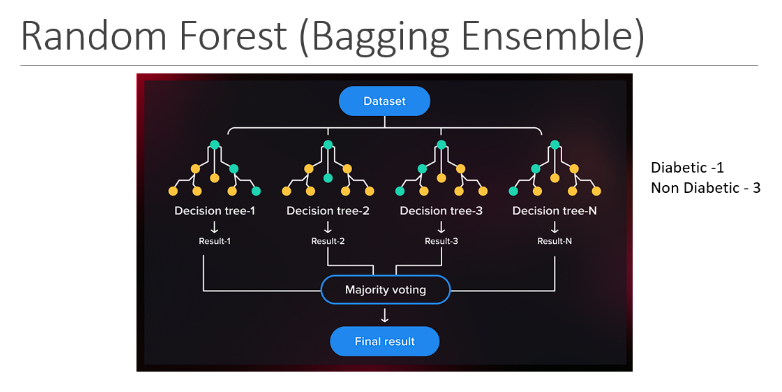

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


## Step 1 - read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Perform Basic Data Quality checks


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:

m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.duplicated().sum()


0

## Step 3: Seperate X and Y(Survived)

In [6]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [9]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

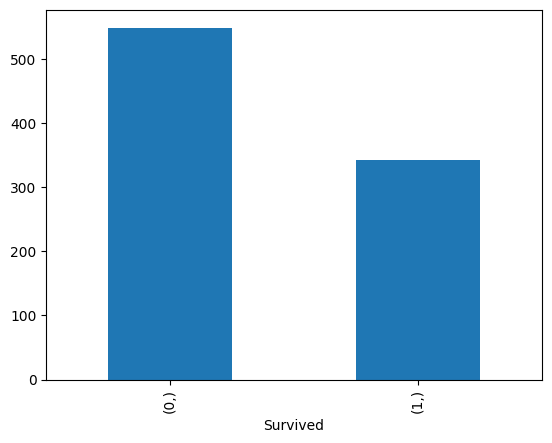

In [10]:
Y.value_counts().plot(kind='bar')


## Step 4: Create a Preprocessing Pipeline for X


In [11]:
# cat and con seperation
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Sex', 'Embarked']

In [13]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [17]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


## Step 5: Apply Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [20]:

xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [21]:

ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [22]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [23]:
ytest.head()


,Survived
709,1
439,0
840,0
720,1
39,1


In [24]:
xtrain.shape


(712, 10)

In [25]:
xtest.shape


(179, 10)

## Step 6: Model Building and Evaluation



In [26]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,
                                max_depth=1,
                                min_samples_split=5,
                                min_samples_leaf=5,
                                criterion='entropy')
model1.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

In [27]:
model1.score(xtrain, ytrain)


0.6235955056179775

In [28]:
model1.score(xtest, ytest)


0.5865921787709497

## Hyperparameter tuning for RandomForest

In [29]:
params = {'n_estimators':[10, 50, 100, 200, 300],
          'max_depth':[1, 2, 3, 4, 5, 6],
          'min_samples_split':[2, 3, 4, 5, 6],
          'criterion':['gini', 'entropy']}

In [30]:

from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [31]:
rscv1.best_params_


{'n_estimators': 300,
 'min_samples_split': 2,
 'max_depth': 6,
 'criterion': 'gini'}

In [32]:
rscv1.best_score_


0.8056005810763555

In [33]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=6, n_estimators=300)

## Predict results for train and test

In [34]:

ypred_train1 = best_rfc.predict(xtrain)
ypred_test1 = best_rfc.predict(xtest)

In [35]:
ypred_train1[0:5]


array([0, 0, 0, 0, 0], dtype=int64)

In [36]:
ytrain.head()


,Survived
331,0
733,0
382,0
704,0
813,0


In [37]:
ypred_test1[0:5]


array([0, 0, 0, 1, 1], dtype=int64)

In [38]:
ytest.head()


,Survived
709,1
439,0
840,0
720,1
39,1


## Plot the confusion matrix for test

In [39]:
best_rfc.classes_


array([0, 1], dtype=int64)

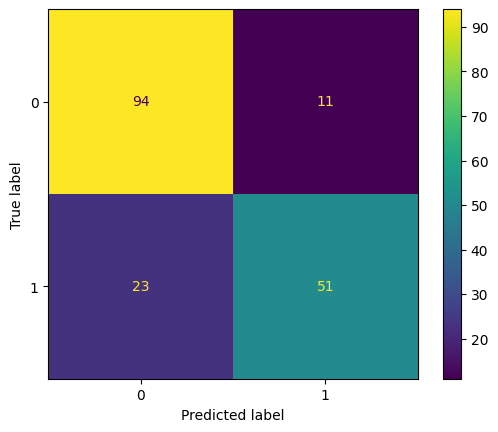

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test1)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

In [41]:

from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Create Model 2- Gradient Boosting Model


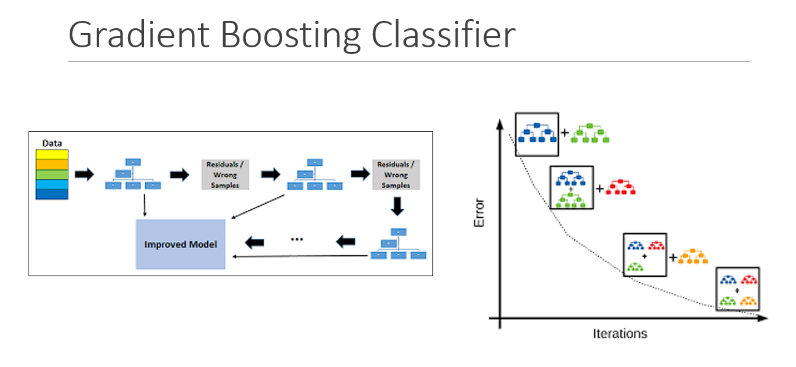

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(n_estimators=1,
                                    learning_rate=0.3,
                                    max_depth=1,
                                    min_samples_split=5,
                                    min_samples_leaf=5)
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.3, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [43]:
model2.score(xtrain, ytrain)


0.6235955056179775

In [44]:
model2.score(xtest, ytest)


0.5865921787709497

## Hyperparameter Tuning of Gradient boost


In [45]:
params2 = {'n_estimators':[10, 50, 100, 200, 300],
           'learning_rate':[0.01, 0.1, 0.15, 0.2],
           'max_depth':[1, 2, 3, 4, 5, 6],
           'min_samples_split':[2, 3, 4, 5, 6, 7]}

In [46]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=params2, cv=5, scoring='f1_macro')
rscv2.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [47]:
rscv2.best_params_


{'n_estimators': 50,
 'min_samples_split': 2,
 'max_depth': 5,
 'learning_rate': 0.15}

In [48]:
rscv2.best_score_


0.7958481060533057

In [49]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.15, max_depth=5, n_estimators=50)

In [50]:
best_gbc.score(xtrain, ytrain)


0.9466292134831461

In [51]:
best_gbc.score(xtest, ytest)


0.8268156424581006

## predict result for train and test

In [52]:
ypred_train2 = best_gbc.predict(xtrain)
ypred_test2 = best_gbc.predict(xtest)

In [53]:
ypred_train2[0:5]


array([0, 0, 0, 0, 0], dtype=int64)

In [54]:
ytrain.head()


,Survived
331,0
733,0
382,0
704,0
813,0


In [55]:
ypred_test2[0:5]


array([0, 0, 0, 1, 1], dtype=int64)

In [56]:
ytest.head()



,Survived
709,1
439,0
840,0
720,1
39,1


## plot confusion matrix for gradient boots

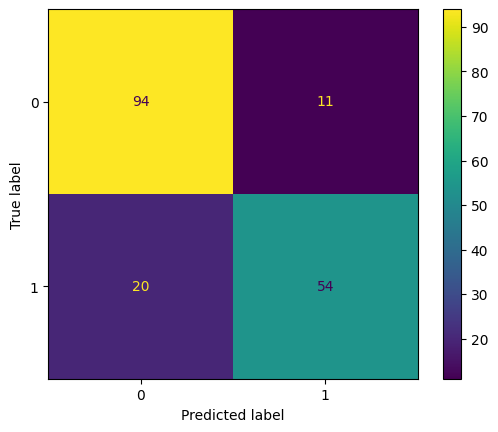

In [59]:

cf2 = confusion_matrix(ytest, ypred_test2)
cfd2 = ConfusionMatrixDisplay(cf2, display_labels=best_gbc.classes_)
cfd2.plot()

## print the classification report

In [60]:

print(classification_report(ytest, ypred_test2))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



### Gradient Boosting Model is slightly better Than Random Forest for given dataset
Test

Gradient Boosting - 81%

Random Forest - 80%

### Step 8: out of sample prediction


In [61]:

xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [63]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


## Predict results with Probability


In [64]:

preds = best_gbc.predict(xnew_pre)
probs = best_gbc.predict_proba(xnew_pre)

In [65]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
best_gbc.classes_


array([0, 1], dtype=int64)

In [67]:
probs[0:5]


array([[0.94560426, 0.05439574],
       [0.57976807, 0.42023193],
       [0.58684467, 0.41315533],
       [0.76762853, 0.23237147],
       [0.57840725, 0.42159275]])

In [68]:
prob_surv = probs[:,1]
prob_surv[0:5]

array([0.05439574, 0.42023193, 0.41315533, 0.23237147, 0.42159275])

## Save above results in a dataframe


In [69]:
df_results = xnew[['PassengerId']]
df_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [70]:

df_results['Survived_pred'] = preds 
df_results['Probability'] = prob_surv

In [71]:
df_results

,PassengerId,Survived_pred,Probability
0,892,0,0.054396
1,893,0,0.420232
2,894,0,0.413155
3,895,0,0.232371
4,896,0,0.421593
...,...,...,...
413,1305,0,0.079072
414,1306,1,0.984752
415,1307,0,0.030038
416,1308,0,0.079072


In [72]:
df_results['Survived_pred'].value_counts()


Survived_pred
0    279
1    139
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

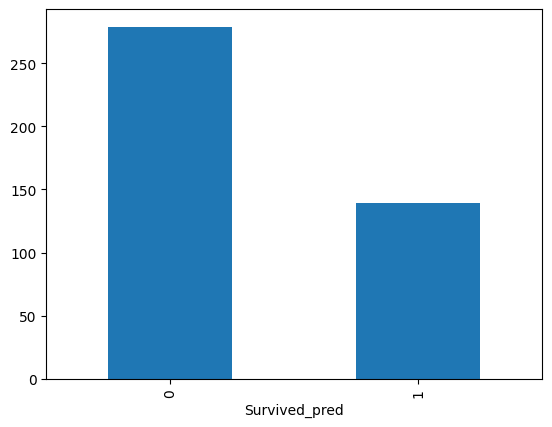

In [73]:
df_results['Survived_pred'].value_counts().plot(kind='bar')


In [74]:
df_results.to_csv('Results.csv', index=False)


## Feature importances

In [75]:

imp = best_gbc.feature_importances_
imp

array([0.13459787, 0.16920956, 0.0508256 , 0.01083593, 0.23869298,
       0.23375598, 0.14439262, 0.00513507, 0.00531125, 0.00724315])

In [76]:
xtrain.columns


Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [77]:
imp = pd.Series(imp)
imp.index = xtrain.columns

In [78]:
imp.sort_values(ascending=False)


num__Fare          0.238693
cat__Sex_female    0.233756
num__Age           0.169210
cat__Sex_male      0.144393
num__Pclass        0.134598
num__SibSp         0.050826
num__Parch         0.010836
cat__Embarked_S    0.007243
cat__Embarked_Q    0.005311
cat__Embarked_C    0.005135
dtype: float64

<Axes: >

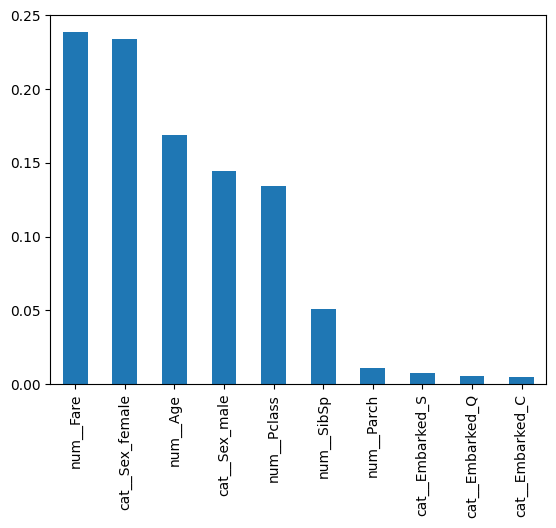

In [79]:
imp.sort_values(ascending=False).plot(kind='bar')


In [80]:

# For Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor